Occupations
Step 1. Import the necessary libraries
Step 2. Import the dataset from raw web link text.
Step 3. Assign it to a variable called users
Step 4. Discover what is the mean age per occupation
Step 5. Discover the Male ratio per occupation and sort it from the most to the least
Step 6. For each occupation, calculate the minimum and maximum ages
Step 7. For each combination of occupation and sex, calculate the mean age
Step 8. For each occupation present the percentage of women and men

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"

users = pd.read_csv(url, sep='|')

mean_age = users.groupby('occupation')['age'].mean()

male_ratio = users[users['gender']=='M'].groupby('occupation').size() / users.groupby('occupation').size()
male_ratio = male_ratio.sort_values(ascending=False)

min_max_age = users.groupby('occupation')['age'].agg(['min', 'max'])

mean_age_sex = users.groupby(['occupation', 'gender'])['age'].mean()

gender_ocup = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})
occup_count = users.groupby(['occupation']).agg('count')
occup_gender = gender_ocup.div(occup_count, level = "occupation") * 100

print("Mean Age per Occupation:\n", mean_age)
print("\nMale Ratio per Occupation:\n", male_ratio)
print("\nMin and Max Age per Occupation:\n", min_max_age)
print("\nMean Age per Occupation and Sex:\n", mean_age_sex)
print("\nPercentage of Women and Men per Occupation:\n", occup_gender)

Mean Age per Occupation:
 occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

Male Ratio per Occupation:
 occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0

Step 1. Import the necessary libraries
Step 2. Import the dataset from this https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv
Step 3. Assign it to a variable called euro12
Step 4. Select only the Goal column
Step 5. How many team participated in the Euro2012?
Step 6. What is the number of columns in the dataset?
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign themto a dataframe called discipline
Step 8. Sort the teams by Red Cards, then to Yellow Cards
Step 9. Calculate the mean Yellow Cards given per Team

In [2]:
import pandas as pd
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"

euro12 = pd.read_csv(url)

goals = euro12['Goals']

num_teams = euro12['Team'].nunique()

num_columns = euro12.shape[1]

discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]

discipline = discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending = False)

mean_yellow_cards = discipline['Yellow Cards'].mean()

print("Goals:\n", goals)
print("\nNumber of Teams:", num_teams)
print("\nNumber of Columns:", num_columns)
print("\nDiscipline:\n", discipline)
print("\nMean Yellow Cards per Team:", mean_yellow_cards)

teams_over_6_goals = euro12[euro12['Goals'] > 6]

teams_starting_with_G = euro12[euro12['Team'].str.startswith('G')]

first_7_columns = euro12.iloc[:, :7]

all_but_last_3 = euro12.iloc[:, :-3]

shooting_accuracy = euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]

print("Teams that scored more than 6 goals:\n", teams_over_6_goals)
print("\nTeams that start with G:\n", teams_starting_with_G)
print("\nFirst 7 columns:\n", first_7_columns)
print("\nAll columns except the last 3:\n", all_but_last_3)
print("\nShooting Accuracy from England, Italy and Russia:\n", shooting_accuracy)


Goals:
 0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

Number of Teams: 16

Number of Columns: 35

Discipline:
                    Team  Yellow Cards  Red Cards
6                Greece             9          1
9                Poland             7          1
11  Republic of Ireland             6          1
7                 Italy            16          0
10             Portugal            12          0
13                Spain            11          0
0               Croatia             9          0
1        Czech Republic             7          0
14               Sweden             7          0
4                France             6          0
12               Russia             6          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
2               Denmark      

Housing
Step 1. Import the necessary libraries
Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000
Step 3. Create a DataFrame by joinning the Series by column
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
Step 5. Create a one column DataFrame with the values of the 3 Series and assign itto 'bigcolumn'
Step 6. Ops it seems it is going only until index 99. Is it true?
Step 7. Reindex the DataFrame so it goes from 0 to 299

In [8]:
import pandas as pd
import numpy as np

s1 = pd.Series(np.random.randint(1, high=5, size=100, dtype='l'))
s2 = pd.Series(np.random.randint(1, high=4, size=100, dtype='l'))
s3 = pd.Series(np.random.randint(10000, high=30001, size=100, dtype='l'))

df = pd.concat([s1, s2, s3], axis=1)
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

bigcolumn = pd.concat([s1, s2, s3], axis=0)
bigcolumn = bigcolumn.to_frame()

print(bigcolumn)
bigcolumn.reset_index(drop=True, inplace=True)
print(bigcolumn)


        0
0       4
1       3
2       4
3       1
4       1
..    ...
95  13588
96  17697
97  23738
98  13248
99  17094

[300 rows x 1 columns]
         0
0        4
1        3
2        4
3        1
4        1
..     ...
295  13588
296  17697
297  23738
298  13248
299  17094

[300 rows x 1 columns]


Wind Statistics
The data have been modified to contain some missing values, identified by NaN.

Using pandas should make this exercise easier, in particular for the bonus question.You should be able to perform all of these operations without using a for loop orother looping construct

The first three columns are year, month, and day. The remaining 12 columns areaverage windspeeds in knots at 12 locations in Ireland on that day.Step 1. Import the necessary libraries
Step 2. Import the dataset from the attached file wind.txt
Step 3. Assign it to a variable called data and replace the first 3 columns by a properdatetime index.
Step 4. Year 2061? Do we really have data from this year? Create a function to fix itand apply it.
Step 5. Set the right dates as the index. Pay attention at the data type, it should bedatetime64[ns].
Step 6. Compute how many values are missing for each location over the entirerecord.They should be ignored in all calculations below.
Step 7. Compute how many non-missing values there are in total.
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations andall the times.A single number for the entire dataset.
Step 9. Create a DataFrame called loc_stats and calculate the min, max and meanwindspeeds and standard deviations of the windspeeds at each location over all thedays different set of numbers for each location.
Step 10. Create a DataFrame called day_stats and calculate the min, max and meanwindspeed and standard deviations of the windspeeds across all the locations at eachday.A different set of numbers for each day.
Step 11. Find the average windspeed in January for each location.Treat January 1961 and January 1962 both as January.
Step 12. Downsample the record to a yearly frequency for each location.
Step 13. Downsample the record to a monthly frequency for each location.
Step 14. Downsample the record to a weekly frequency for each location.
Step 15. Calculate the min, max and mean windspeeds and standard deviations of thewindspeeds across all locations for each week (assume that the first week starts onJanuary 2 1961) for the first 52 weeks

In [23]:
import pandas as pd
import numpy as np
import datetime

data_url = 'wind.txt'
data = pd.read_csv(data_url, sep = "\s+", parse_dates = [[0,1,2]]) 

def fix_century(x):
  year = x.year - 100 if x.year > 1989 else x.year
  return datetime.date(year, x.month, x.day)

data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(fix_century)

data["Yr_Mo_Dy"] = pd.to_datetime(data["Yr_Mo_Dy"])

data = data.set_index('Yr_Mo_Dy')

print(data.isnull().sum())

print(data.shape[0] - data.isnull().sum())

print(data.mean().mean())

loc_stats = pd.DataFrame()

loc_stats['min'] = data.min() # min
loc_stats['max'] = data.max() # max 
loc_stats['mean'] = data.mean() # mean
loc_stats['std'] = data.std() # standard deviations

day_stats = pd.DataFrame()

day_stats['min'] = data.min(axis = 1) # min
day_stats['max'] = data.max(axis = 1) # max 
day_stats['mean'] = data.mean(axis = 1) # mean
day_stats['std'] = data.std(axis = 1) # standard deviations

print(data.loc[data.index.month == 1].mean())

print(data.resample('A').mean())

print(data.resample('M').mean())

print(data.resample('W').mean())

weeklyRes = data.resample('W').mean().apply(lambda x: [x.min(), x.max(), x.mean(), x.std()])

print(weeklyRes.loc[weeklyRes.index[1:53]])


RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64
RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64
10.227982360836938
RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64
                  RPT        VAL        ROS       KIL        SHA       BIR  \
Yr_Mo_Dy                                                                     
1961-12-31  12.299583  10.351796  11.362369  6.958227  10.881763  7.729726   
1962-12-31  12.246923  10.110438  11.732712  6.960440  10.657918  7.393068   
1963-12-31  12.813452  10.836986  12.541151  7.330055  11.724110  8.434712   
1964-12-31  12.363661  10.920164  12.104372  6.787787  11.454481  7.570874   
1965-12-31  12.4

Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called chipo.
Step 4. See the first 10 entries
Step 5. What is the number of observations in the dataset?
Step 6. What is the number of columns in the dataset?
Step 7. Print the name of all the columns.
Step 8. How is the dataset indexed?
Step 9. Which was the most-ordered item?
Step 10. For the most-ordered item, how many items were ordered?
Step 11. What was the most ordered item in the choice_description column?
Step 12. How many items were orderd in total?
Step 13. Turn the item price into a float• Check the item price type• Create a lambda function and change the type of item price• Check the item price type
Step 14. How much was the revenue for the period in the dataset?
Step 15. How many orders were made in the period?Step 16. What is the average revenue amount per order?Step 17. How many different items are sold?

In [10]:
import pandas as pd

url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep = '\t')

print(chipo.head(10))

print(chipo.shape[0])

print(chipo.shape[1])

print(chipo.columns)

print(chipo.index)

most_ordered = chipo['item_name'].value_counts().idxmax()
print(most_ordered)

most_ordered_count = chipo['item_name'].value_counts().max()
print(most_ordered_count)

most_ordered_desc = chipo['choice_description'].value_counts().idxmax()
print(most_ordered_desc)

total_items = chipo['quantity'].sum()
print(total_items)

chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
print(chipo['item_price'].dtype)

revenue = (chipo['quantity']* chipo['item_price']).sum()
print(revenue)

orders = chipo['order_id'].value_counts().count()
print(orders)

average_revenue = revenue/orders
print(average_revenue)

diff_items = chipo['item_name'].value_counts().count()
print(diff_items)


   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

Create a line plot showing the number of marriages and divorces per capita in theU.S. between 1867 and 2014. Label both lines and show the legend.Don't forget to label your axes!

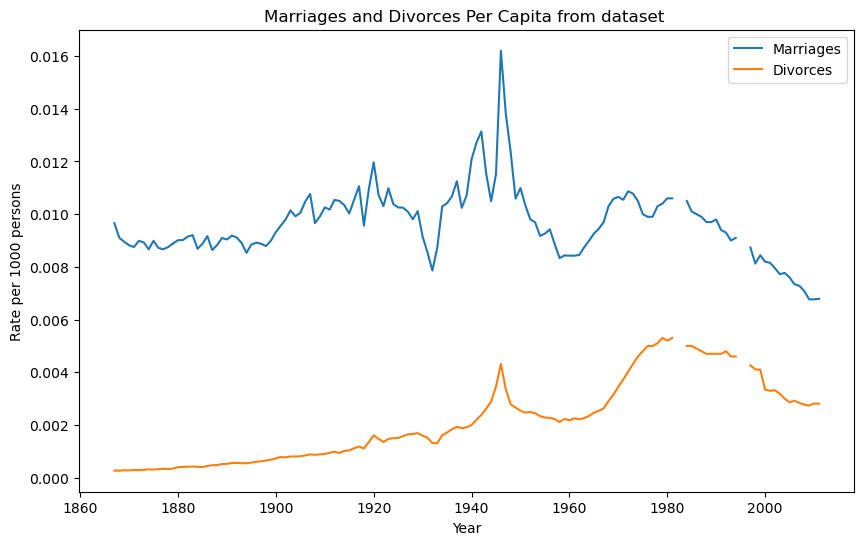

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('us-marriages-divorces-1867-2014.csv')

data['Marriages_per_capita'] = data['Marriages'] / data['Population']
data['Divorces_per_capita'] = data['Divorces'] / data['Population']

plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['Marriages_per_capita'], label='Marriages')
plt.plot(data['Year'], data['Divorces_per_capita'], label='Divorces')

plt.xlabel('Year')
plt.ylabel('Rate per 1000 persons')
plt.title('Marriages and Divorces Per Capita from dataset ')
plt.legend()

plt.show()


Create a vertical bar chart comparing the number of marriages and divorces percapita in the U.S. between 1900, 1950, and 2000.Don't forget to label your axes!

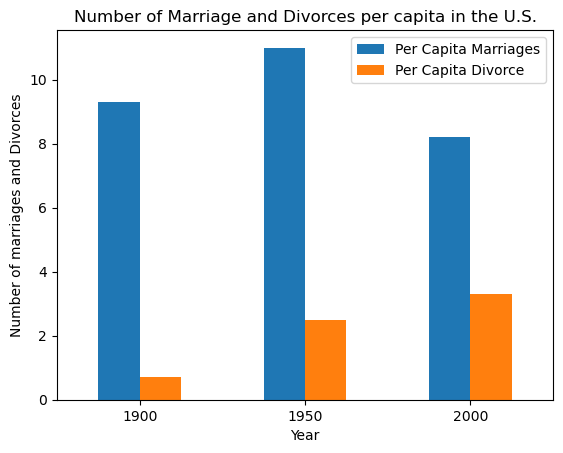

In [17]:
divorce_data = pd.read_csv('us-marriages-divorces-1867-2014.csv')
divorce_data = divorce_data[    divorce_data['Year'].apply(lambda x: x in [1900, 1950, 2000])]

years = divorce_data['Year'].values
marriages_per_capita = divorce_data['Marriages_per_1000'].values
divorces_per_capita = divorce_data['Divorces_per_1000'].values

df = pd.DataFrame({'Per Capita Marriages': marriages_per_capita,'Per Capita Divorce': divorces_per_capita}, index=years)
ax = df.plot.bar(rot=0)
plt.xlabel("Year")
plt.ylabel("Number of marriages and Divorces")
plt.title('Number of Marriage and Divorces per capita in the U.S.')
plt.legend()
plt.show()

Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sortthe actors by their kill count and label each bar with the corresponding actor's name.Don't forget to label your axes!

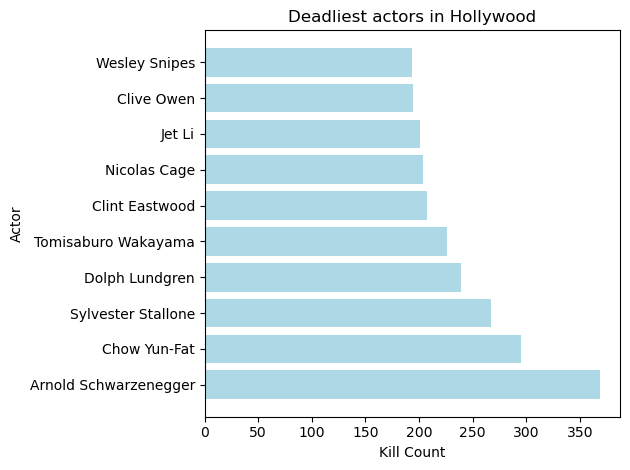

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('actor_kill_counts.csv')

data_sorted = data.sort_values(by='Count', ascending=False)
plt.barh(data_sorted['Actor'], data_sorted['Count'], color='lightblue')

plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest actors in Hollywood')
plt.tight_layout()
plt.show()


Create a pie chart showing the fraction of all Roman Emperors that were assassinated. Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories

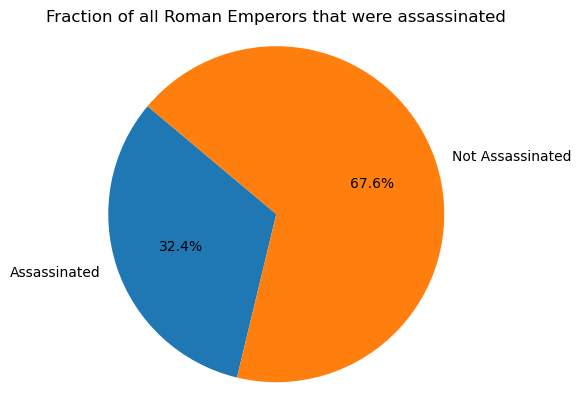

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('roman-emperor-reigns.csv')

assassinated_emperors = data[data['Cause_of_Death'] == 'Assassinated']
total_emperors = len(data)
fraction_assassinated = len(assassinated_emperors) / total_emperors

labels = ['Assassinated', 'Not Assassinated']
sizes = [fraction_assassinated, 1 - fraction_assassinated]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

plt.axis('equal') 
plt.title('Fraction of all Roman Emperors whp all were assassinated')
plt.show()


Create a scatter plot showing the relationship between the total revenue earned byarcades and the number of Computer Science PhDs awarded in the U.S. between2000 and 2009.Don't forget to label your axes!Color each dot according to its year.

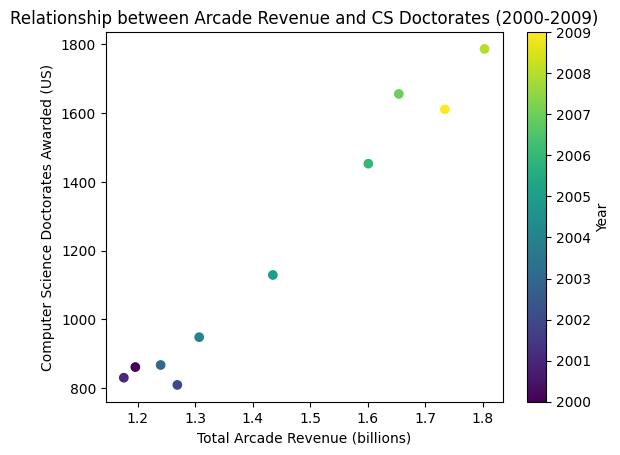

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

# Create the scatter plot
plt.scatter(data['Total Arcade Revenue (billions)'], data['Computer Science Doctorates Awarded (US)'], c=data['Year'], cmap='viridis')

plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.title('Relationship between Arcade Revenue and CS Doctorates (2000-2009)')
plt.colorbar(label='Year')

plt.show()
